_This notebook walks through data integration, model building, and optimization. The end result is a curated summary of information that can be used to maximize cost savings for renewable energy use._

# Environment Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sundial

C:\Users\mrste\Anaconda3\envs\anapy36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mrste\Anaconda3\envs\anapy36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Getting the Data

## Download files

In [ ]:
TBD?

## Integrate data 

In [ ]:
TBD?

# Building Independent Models

## Battery Degradation

In [2]:
# Set battery statics
usage_kWhr = 8
t_start    = 18   # 6:00pm, sun goes down
t_final    = 22   # 10:00pm, this means battery stops at 10:00pm, not 10:59
date       = 343  # Dec 9th
cap_kWhr   = 13.5 # battery capacity
cost_mult  = 222*cap_kWhr # cost scales with capacity, adjust to make relavent if needed

# Compute battery degradation cost per hour.
battery_cph = sundial.battery_model.bat_price_per_hour(usage_kWhr, 
                                                       t_start,
                                                       t_final,
                                                       date,
                                                       cap_kWhr,
                                                       cost_mult)

print(battery_cph)

[ 0.02831017  0.02831017  0.02831017  0.02831017  0.02831017  0.02831017
  0.02831017  0.02831017  0.02831017  0.02831017  0.02831017  0.02831017
  0.02831017  0.02831017  0.02831017  0.02831017  0.02831017  0.02831017
  0.26659312  0.26659312  0.26659312  0.26659312  0.02831017  0.02831017]


## Energy Price

In [3]:
epm = sundial.price_model.EnergyPriceModel()
price_cph = epm.test_model("2016-12-08", "SVM_rbf")

print(price_cph)

[ 32.19015215  36.43083971  31.89780703  28.93836475  31.43631105
  31.00931086  29.58275531  29.1197807   28.57548864  30.70826625
  32.90944406  32.52323928  28.02839139  25.80837985  24.78875951
  29.32269832  21.13044295  19.29652082  47.3891587   31.71214353
  40.31117218  24.71340464  56.25528621  43.67043595]


C:\Users\mrste\Anaconda3\envs\anapy36\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator SVR from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Solar Output

In [4]:
pv_output_cph = sundial.pv_model.pv_output_cph()
print(pv_output_cph)

[ 0.89223962  0.88788556  0.80101199  0.85368411  0.88944971  0.84200119
  0.79506663  0.9195158   0.8920578   0.89254767  0.89246405  0.89244044
  0.89244044  0.89244082  0.89244047  0.89244044  0.89244152  0.89575352
  0.89244378  0.88727454  0.88592615  0.89211695  0.89191706  0.89239976]


## Energy Demand

In [5]:
demand_cph = sundial.demand_model.get_demand_cph()

C:\Users\mrste\Google Drive\Courses\2017\2017 Autumn\CSE 583 Software Development for Data Scientists (Beck)\Assignments\SunDial\sundial\demand_model\demand_model.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sm_obs["DateTime"] = sm_datetime


['Date/Time', 'Electricity:Facility [kW](Hourly)', 'Gas:Facility [kW](Hourly)', 'Heating:Electricity [kW](Hourly)', 'Heating:Gas [kW](Hourly)', 'HVACFan:Fans:Electricity [kW](Hourly)', 'Electricity:HVAC [kW](Hourly)', 'Fans:Electricity [kW](Hourly)', 'General:InteriorLights:Electricity [kW](Hourly)', 'General:ExteriorLights:Electricity [kW](Hourly)', 'Appl:InteriorEquipment:Electricity [kW](Hourly)', 'Misc:InteriorEquipment:Electricity [kW](Hourly)', 'Water Heater:WaterSystems:Gas [kW](Hourly) ', 'DateTime', 'STATION', 'NAME', 'DATE', 'HLY-CLDH-NORMAL', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTCLR', 'HLY-CLOD-PCTFEW', 'HLY-CLOD-PCTOVC', 'HLY-CLOD-PCTSCT', 'HLY-DEWP-10PCTL', 'HLY-DEWP-90PCTL', 'HLY-DEWP-NORMAL', 'HLY-HIDX-NORMAL', 'HLY-HTDH-NORMAL', 'HLY-PRES-10PCTL', 'HLY-PRES-90PCTL', 'HLY-PRES-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL', 'HLY-TEMP-NORMAL', 'HLY-WCHL-NORMAL', 'HLY-WIND-1STDIR', 'HLY-WIND-1STPCT', 'HLY-WIND-2NDDIR', 'HLY-WIND-2NDPCT', 'HLY-WIND-AVGSPD', 'HLY-WIND-PCTCLM', 'HL

## Integrating Cost Models

In [6]:
df = pd.DataFrame({'battery_cph': battery_cph,
                  'price_cph': price_cph,
                  'demand_cph': demand_cph,
                  'pv_out_cph': pv_output_cph})

print(df)

    battery_cph  demand_cph  price_cph  pv_out_cph
0      0.028310         NaN  32.190152    0.892240
1      0.028310    0.581740  36.430840    0.887886
2      0.028310    0.519491  31.897807    0.801012
3      0.028310    0.502310  28.938365    0.853684
4      0.028310    0.504078  31.436311    0.889450
5      0.028310    0.534606  31.009311    0.842001
6      0.028310    0.640131  29.582755    0.795067
7      0.028310    0.825097  29.119781    0.919516
8      0.028310    0.890444  28.575489    0.892058
9      0.028310    0.822617  30.708266    0.892548
10     0.028310    0.770625  32.909444    0.892464
11     0.028310    0.769667  32.523239    0.892440
12     0.028310    0.756451  28.028391    0.892440
13     0.028310    0.731867  25.808380    0.892441
14     0.028310    0.714602  24.788760    0.892440
15     0.028310    0.728420  29.322698    0.892440
16     0.028310    0.816318  21.130443    0.892442
17     0.028310    1.016420  19.296521    0.895754
18     0.266593    1.242905  47

# Cost Maximization

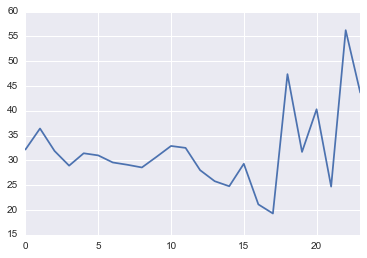

In [20]:
%matplotlib inline

df['price_cph'].plot()

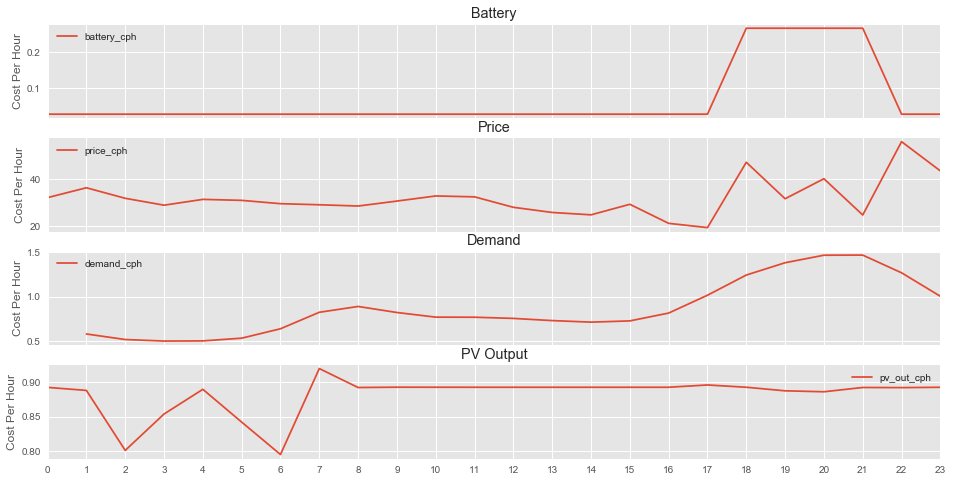

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(4, 1, figsize=(16, 8), sharey=False, sharex=True)
plt.xticks(np.arange(0, 24))

df.plot.line(df.index, 'battery_cph', ax=ax[0])
df.plot.line(df.index,'price_cph', use_index=True, ax=ax[1])
df.plot.line(df.index,'demand_cph', ax=ax[2])
df.plot.line(df.index,'pv_out_cph', ax=ax[3])

ax[0].set_title("Battery")
ax[1].set_title("Price")
ax[2].set_title("Demand")
ax[3].set_title("PV Output")

for a in ax:
    a.set_ylabel("Cost Per Hour")

## Alternate Cost Scenarios

In [39]:
df['Scenario_A'] = # put formula here (cumsum?)
df['Scenario_B'] = # put formula here
df['Scenario_C'] = # put formula here

df.plt(['Scenaro_A', 'Scenario_B', 'Scenario_C'])

ValueError: Must pass DataFrame with boolean values only